# On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.


## Wyatt Prall, Bryan Zack, Zack Supple

## The information was found on the website Kaggle. It contains the list of Pokemon and battle statistics. The data was downloaded from Kaggle.

## The problem we are trying to solve is create a classification analytics to help predict wins.

# Getting started

In [1]:
#Importing the Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

/Users/zacksupple/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Importing the data set
df=pd.read_csv("data/pokedata.csv")
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,FirstPosition,Second Position,Total Wins
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,70,63,37
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,55,66,46
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,68,64,89
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,62,63,70
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,50,62,55


# Data Cleaning 

### #: The number assigned to the Pokemon
### Name: Is the name of the Pokemon
### Type1: Is the type of attacks that the Pokemon uses
### Type2: Is also a type of attack that the Pokemon uses and this classification is not used for all Pokemon
### HP: This stands for health points or hit points it represents how much attack a Pokemon can take before it loses
### Attack: This describes how much damage the Pokemon does with each normal attack
### Defense: This is used to explain how much damage can be obsorbed before the attack depleats the hp points
### Sp. Atk: This stands for special attack damage
### Sp. Def: This stands for special attack defense
### Speed: This determins how quickly a Pokemon can attack
### Generation: This determines what game that the Pokemon was first introduced in
### Legendary: This determines if the Pokemon is of legendary status or not
### FirstPostion: During the 50,000 simulated battles this determines how many times the Pokemon was in attack Position one
### SecondPostion: During the 50,000 simulated battles this determines how many times the Pokemon was in attack Position two
### Total Wins: Describes how many battles the Pokemon won


In [3]:
# Showing how many of each type of Pokemon there are
df.groupby(['Type 1']).count()

,#,Name,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,FirstPosition,Second Position,Total Wins
Type 1,,,,,,,,,,,,,,
Bug,69,69,52,69,69,69,69,69,69,69,69,69,69,69
Dark,31,31,21,31,31,31,31,31,31,31,31,31,31,31
Dragon,32,32,21,32,32,32,32,32,32,32,32,32,32,32
Electric,44,44,17,44,44,44,44,44,44,44,44,44,44,44
Fairy,17,17,2,17,17,17,17,17,17,17,17,17,17,17
Fighting,27,27,7,27,27,27,27,27,27,27,27,27,27,27
Fire,52,52,24,52,52,52,52,52,52,52,52,52,52,52
Flying,4,4,2,4,4,4,4,4,4,4,4,4,4,4
Ghost,32,32,22,32,32,32,32,32,32,32,32,32,32,32


In [4]:
# Dropping the second type because it will be unnecessary for the analysis
df =df.drop (['Type 2'], axis = 1)
df.head()

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,FirstPosition,Second Position,Total Wins
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False,70,63,37
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False,55,66,46
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False,68,64,89
3,4,Mega Venusaur,Grass,80,100,123,122,120,80,1,False,62,63,70
4,5,Charmander,Fire,39,52,43,60,50,65,1,False,50,62,55


In [5]:
# Creating a new column that will show how many battles each Pokemon battled in
df['Total Fights']= df['FirstPosition']+df['Second Position']
df.head()

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,FirstPosition,Second Position,Total Wins,Total Fights
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False,70,63,37,133
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False,55,66,46,121
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False,68,64,89,132
3,4,Mega Venusaur,Grass,80,100,123,122,120,80,1,False,62,63,70,125
4,5,Charmander,Fire,39,52,43,60,50,65,1,False,50,62,55,112


In [6]:
#Computing the Win Percentage for each Pokemon in a new column
df['Win Percentage'] = df['Total Wins']/ df['Total Fights']
df

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,FirstPosition,Second Position,Total Wins,Total Fights,Win Percentage
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False,70,63,37,133,0.278195
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False,55,66,46,121,0.380165
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False,68,64,89,132,0.674242
3,4,Mega Venusaur,Grass,80,100,123,122,120,80,1,False,62,63,70,125,0.560000
4,5,Charmander,Fire,39,52,43,60,50,65,1,False,50,62,55,112,0.491071
5,6,Charmeleon,Fire,58,64,58,80,65,80,1,False,66,52,64,118,0.542373
6,7,Charizard,Fire,78,84,78,109,85,100,1,False,60,73,115,133,0.864662
7,8,Mega Charizard X,Fire,78,130,111,130,85,100,1,False,65,74,119,139,0.856115
8,9,Mega Charizard Y,Fire,78,104,78,159,115,100,1,False,66,69,114,135,0.844444
9,10,Squirtle,Water,44,48,65,50,64,43,1,False,58,59,19,117,0.162393


In [7]:
#Dropping the FirstPosition and Second Postition from the data
df =df.drop (['FirstPosition','Second Position'], axis = 1)
df.head()

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Wins,Total Fights,Win Percentage
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False,37,133,0.278195
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False,46,121,0.380165
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False,89,132,0.674242
3,4,Mega Venusaur,Grass,80,100,123,122,120,80,1,False,70,125,0.560000
4,5,Charmander,Fire,39,52,43,60,50,65,1,False,55,112,0.491071


In [8]:
df.info()
#Showing the data types for the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
#                 800 non-null int64
Name              800 non-null object
Type 1            800 non-null object
HP                800 non-null int64
Attack            800 non-null int64
Defense           800 non-null int64
Sp. Atk           800 non-null int64
Sp. Def           800 non-null int64
Speed             800 non-null int64
Generation        800 non-null int64
Legendary         800 non-null bool
Total Wins        800 non-null int64
Total Fights      800 non-null int64
Win Percentage    800 non-null float64
dtypes: bool(1), float64(1), int64(10), object(2)
memory usage: 82.1+ KB


## Visualizing the Data

In [9]:
# Creating a color pallet for each unique pokemon type
colors = ['#78C850', '#F08030', '#6890F0', '#A8B820','#A8A878','#A040A0','#F8D030','#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#A292BC','#98D8D8','#7038F8','#49392F','#B8B8D0','#A890F0']


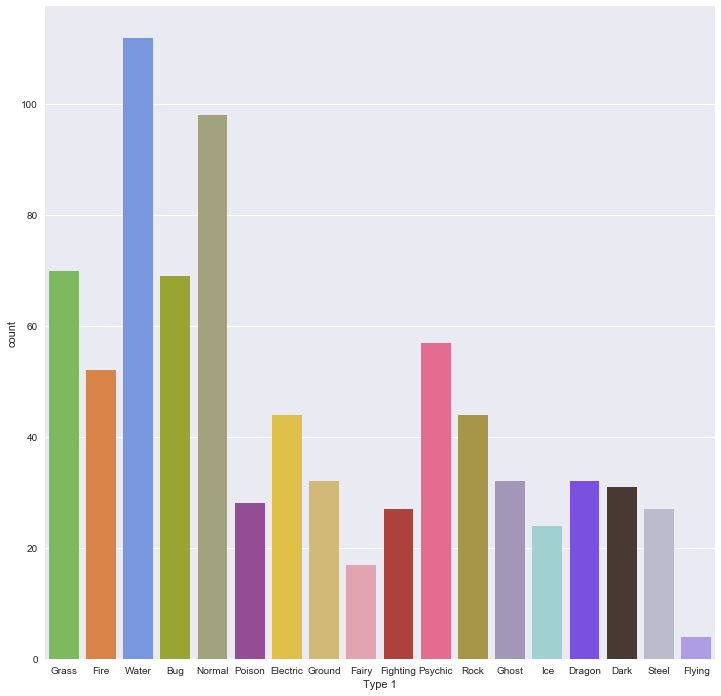

In [10]:
# This graph counts how many of each Pokemon are in a type
ax = plt.subplots(figsize=(12,12))
ax =sns.countplot(x='Type 1', data=df, palette = colors)


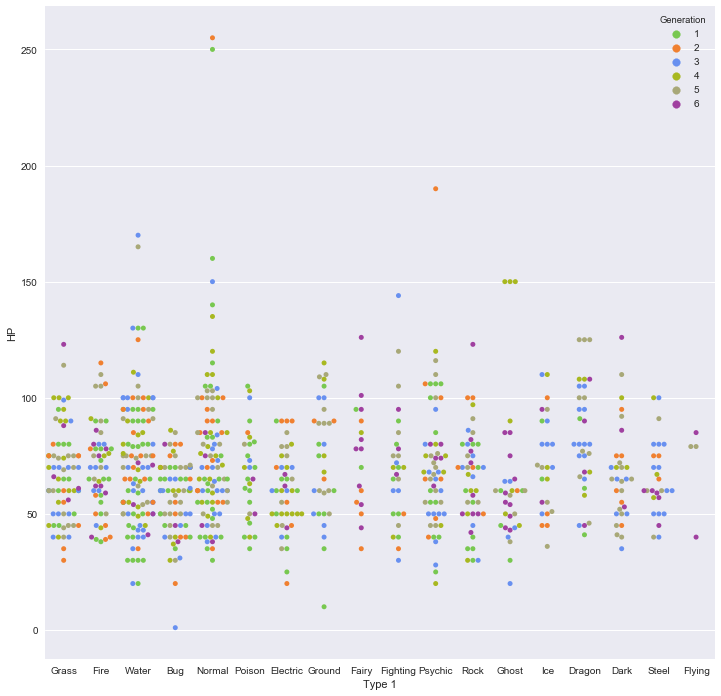

In [11]:
# This graph shows the Health spread by type 1 and it is hued by generation
av = plt.subplots(figsize=(12,12))
av= sns.swarmplot(x="Type 1", y="HP", hue="Generation", data=df, palette=colors)

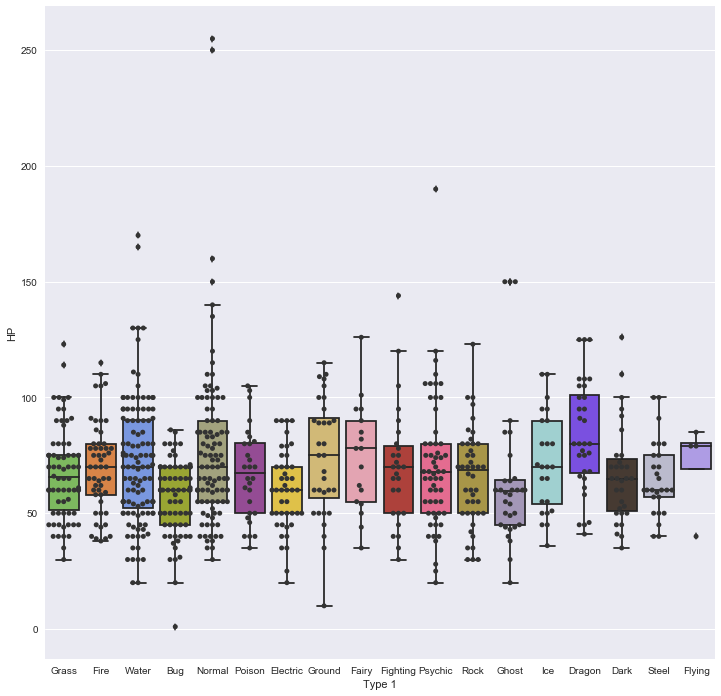

In [12]:
# This displays Health by Type 1
s = plt.subplots(figsize=(12,12))
s = sns.boxplot(x="Type 1", y="HP", data=df, palette=colors)
s = sns.swarmplot(x="Type 1", y="HP", data=df, color=".2")

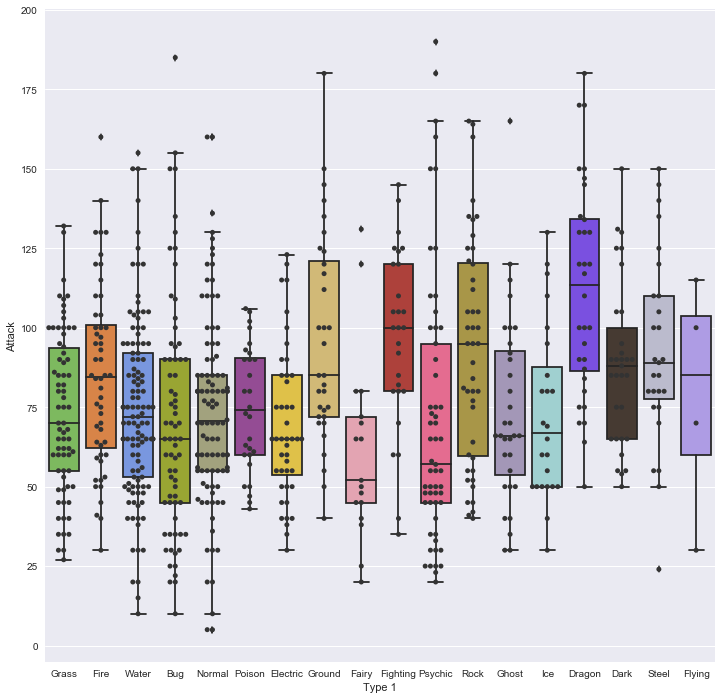

In [13]:
# Attack based on Generation
a = plt.subplots(figsize=(12,12))
a = sns.boxplot(x="Type 1", y="Attack", data=df, palette=colors)
a = sns.swarmplot(x="Type 1", y="Attack", data=df, color=".2")

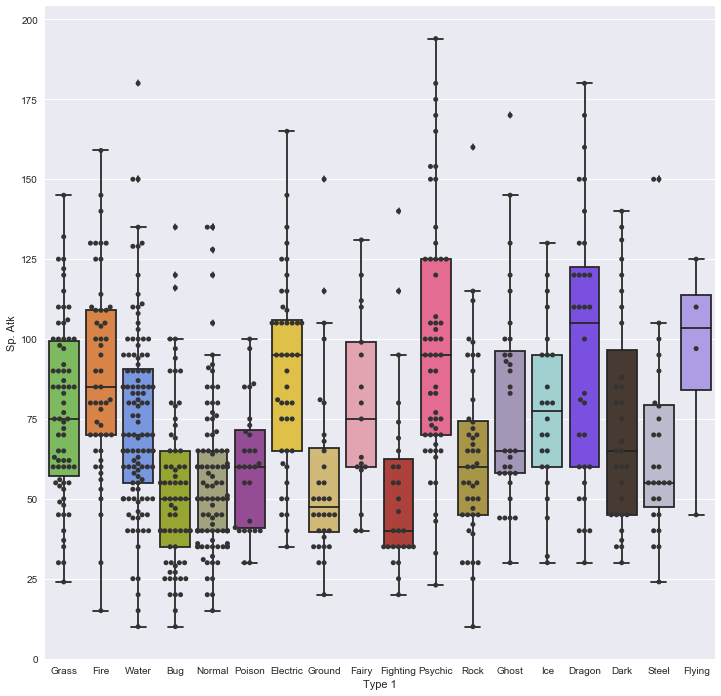

In [14]:
# Type compared to special attack damage
b = plt.subplots(figsize=(12,12))
b = sns.boxplot(x="Type 1", y="Sp. Atk", data=df, palette=colors)
b = sns.swarmplot(x="Type 1", y="Sp. Atk", data=df, color=".2")

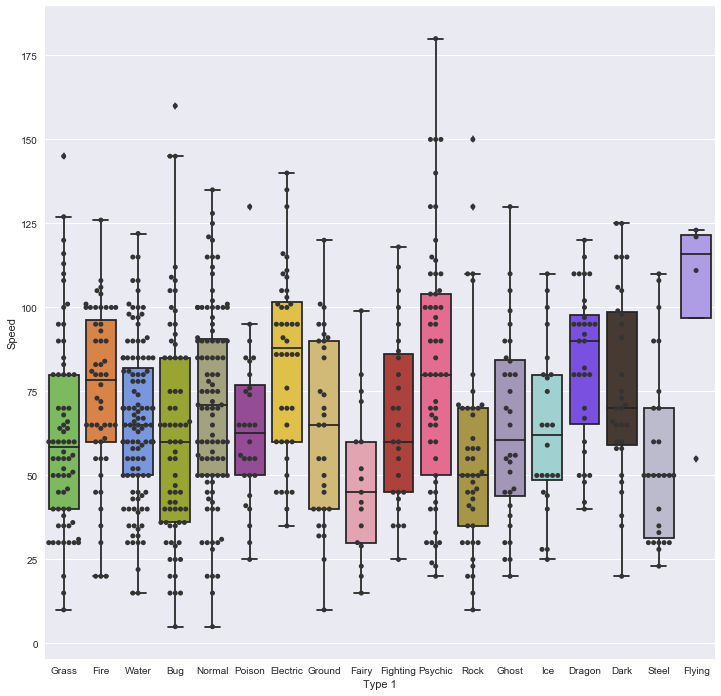

In [15]:
# Type by speed
b = plt.subplots(figsize=(12,12))
b = sns.boxplot(x="Type 1", y="Speed", data=df, palette=colors)
b = sns.swarmplot(x="Type 1", y="Speed", data=df, color=".2")

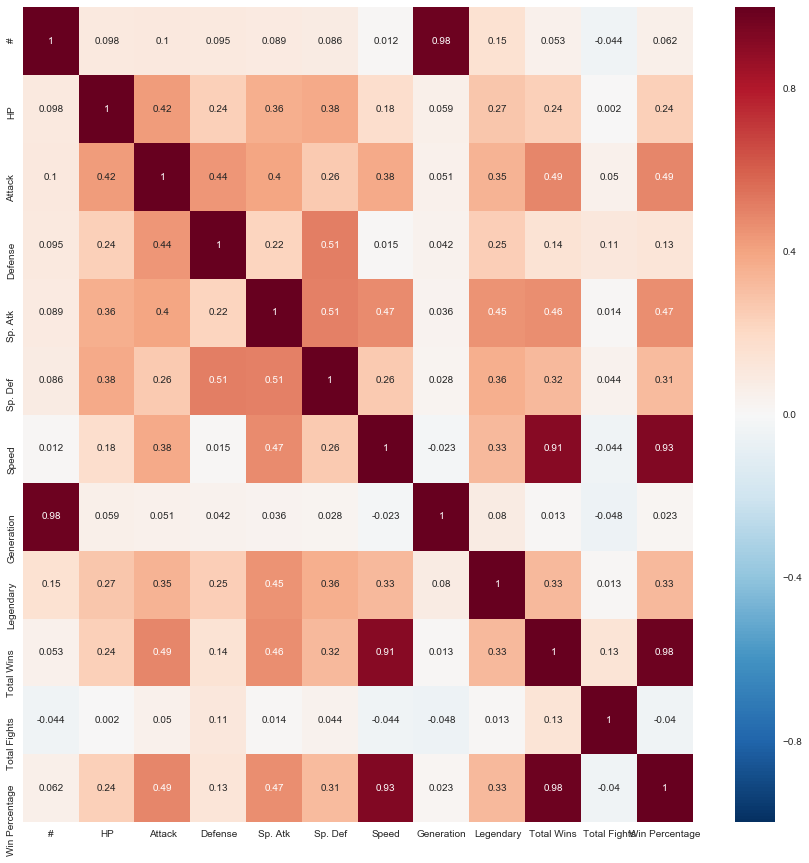

In [16]:
# This heatmap shows the correlation between the data points
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

### We would like to point out the high correlation between Win Percentage and Speed

In [17]:
# Grouping by speed and Win Percentage
df.groupby(['Speed','Win Percentage']).count()

#  Name  Type 1  HP  Attack  Defense  Sp. Atk  Sp. Def  \
Speed Win Percentage                                                           
5     0.570370        1     1       1   1       1        1        1        1   
      0.686441        1     1       1   1       1        1        1        1   
10    0.198198        1     1       1   1       1        1        1        1   
      0.232000        1     1       1   1       1        1        1        1   
      0.294964        1     1       1   1       1        1        1        1   
15    0.021739        1     1       1   1       1        1        1        1   
      0.043478        1     1       1   1       1        1        1        1   
      0.048000        1     1       1   1       1        1        1        1   
      0.052632        1     1       1   1       1        1        1        1   
      0.062500        1     1       1   1       1        1        1        1   
      0.116667        1     1       1   1       1        1        1        1   
      0.146789        1     1       1   1       1        1        1        1   
      0.187500        1     1       1   1       1        1        1        1   
      0.196721        1     1       1   1       1        1        1        1   
20    0.024590        1     1       1   1       1        1        1        1   
      0.031008        1     1       1   1       1        1        1        1   
      0.032520        1     1       1   1       1        1        1        1   
      0.072000        1     1       1   1       1        1        1        1   
      0.072464        1     1       1   1       1        1        1        1   
      0.096296        1     1       1   1       1        1        1        1   
      0.115385        1     1       1   1       1        1        1        1   
      0.118519        1     1       1   1       1        1        1        1   
      0.136752        1     1       1   1       1        1        1        1   
      0.272000        1     1       1   1       1        1        1        1   
      0.282443        1     1       1   1       1        1        1        1   
      0.335878        1     1       1   1       1        1        1        1   
      0.430657        1     1       1   1       1        1        1        1   
      0.448529        1     1       1   1       1        1        1        1   
      0.580645        1     1       1   1       1        1        1        1   
22    0.232558        1     1       1   1       1        1        1        1   
...                  ..   ...     ...  ..     ...      ...      ...      ...   
120   0.939850        1     1       1   1       1        1        1        1   
121   0.944444        1     1       1   1       1        1        1        1   
      0.968000        1     1       1   1       1        1        1        1   
122   0.960630        1     1       1   1       1        1        1        1   
123   0.930435        1     1       1   1       1        1        1        1   
125   0.909091        1     1       1   1       1        1        1        1   
      0.940171        1     1       1   1       1        1        1        1   
      0.974790        1     1       1   1       1        1        1        1   
126   0.909091        1     1       1   1       1        1        1        1   
127   0.940678        1     1       1   1       1        1        1        1   
128   0.959350        1     1       1   1       1        1        1        1   
130   0.862595        1     1       1   1       1        1        1        1   
      0.925373        1     1       1   1       1        1        1        1   
      0.925926        1     1       1   1       1        1        1        1   
      0.926230        1     1       1   1       1        1        1        1   
      0.926829        1     1       1   1       1        1        1        1   
      0.964539        1     1       1   1       1        1        1        1   
135   0.917910        

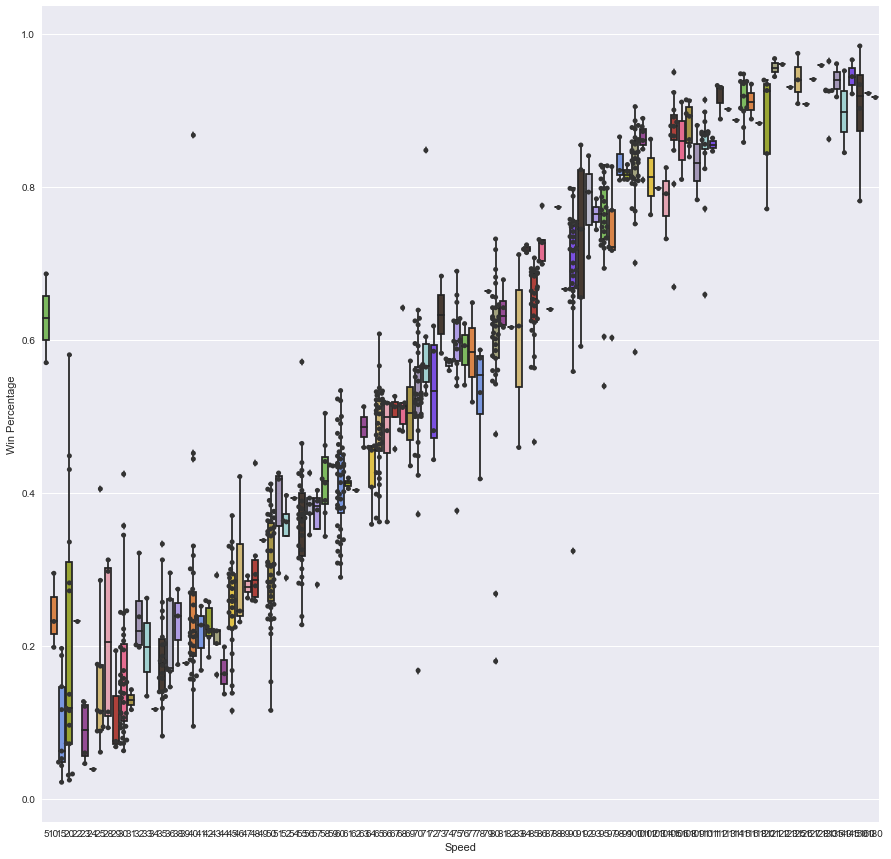

In [18]:
# Graphing the Speed by Win Percentage
b = plt.subplots(figsize=(15,15))
b = sns.boxplot(x="Speed", y="Win Percentage", data=df, palette=colors)
b = sns.swarmplot(x="Speed", y="Win Percentage", data=df, color=".2")
# This graph shows a very positive trend between speed and Win Percentage

In [19]:
# Creating the Variables that will be used in the random forest
y = df['Total Wins']
# We used nothing that is categorical and did not use Total Wins or Win Percentage
X = df.drop(['#','Name','Type 1','Generation','Legendary','Total Wins','Win Percentage','Total Fights'], axis=1)

# Random Forest Sampling

In [20]:
y.head()
#Displaying the top 5 rows for Y 

0    37
1    46
2    89
3    70
4    55
Name: Total Wins, dtype: int64

In [21]:
X.head()
#Displaying the top 5 rows for X

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)  
clf=clf.fit(X, y)
clf.score(X,y)
# Using Random Forest Sampling
# This model has a 97% accuracy

0.97499999999999998

In [23]:
print metrics.accuracy_score(y, clf.predict(X)) #overall accuracy
print metrics.confusion_matrix(y, clf.predict(X))
print metrics.classification_report(y, clf.predict(X))
# Displaying the Random forest accuracy matrix and classification report

0.975
[[2 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 2 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 1]]
             precision    recall  f1-score   support

          3       0.67      1.00      0.80         2
          4       1.00      1.00      1.00         2
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         2
          7       1.00      0.50      0.67         2
          8       1.00      1.00      1.00         3
          9       1.00      1.00      1.00         5
         10       1.00      1.00      1.00         3
         11       1.00      1.00      1.00         4
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         6
         14       1.00      1.00      1.00         8
         15       1.00      1.00      1.00         7
         16       1.00      1.00      1.00         5
         17       1.00      1.00      1.00         5
         18      

/Users/zacksupple/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree sampling

In [24]:
# decison tree variables
y = df['Legendary']
X = df.drop(['#', 'Name', 'Type 1', 'Generation', 'Legendary', 'Total Wins', 'Total Fights', 'Win Percentage'], axis=1)

In [25]:
# Check variable
print y.head()
print X.head()

0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool
   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0  45      49       49       65       65     45
1  60      62       63       80       80     60
2  80      82       83      100      100     80
3  80     100      123      122      120     80
4  39      52       43       60       50     65


In [26]:
# create the test and train data sets for the decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [27]:
# decision tree descriptors
dt= DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [28]:
# check accuracy of the decision tree
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))

0.9375
[[213  10]
 [  5  12]]


In [29]:
# Viusualize decision tree
tree.export_graphviz(dt, out_file='data/decisiontree1.dot', feature_names=X.columns)

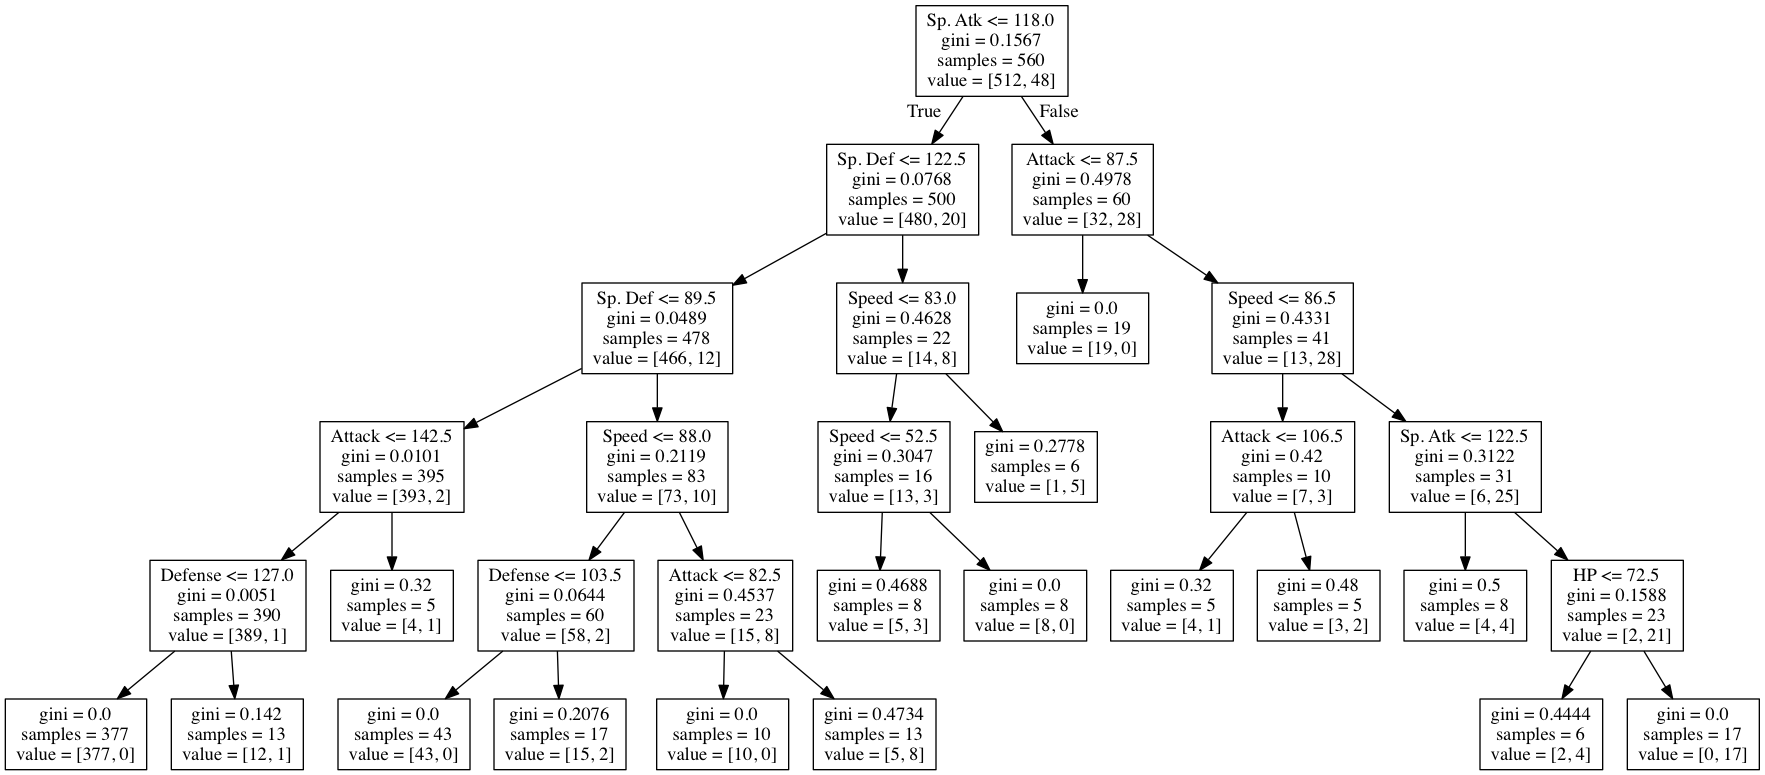

In [30]:
# show decision tree in the notebook
from IPython.display import Image
Image("data/decisiontree1.png")

# Who is best? worst?

In [31]:
# best 5 pokemon win percentage
df.sort_values(by= 'Win Percentage', ascending=False).head(5)

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Wins,Total Fights,Win Percentage
154,155,Mega Aerodactyl,Rock,80,135,85,70,95,150,1,False,127,129,0.984496
512,513,Weavile,Dark,70,120,65,45,85,125,4,False,116,119,0.974790
703,704,Tornadus Therian Forme,Flying,79,100,80,110,90,121,5,True,121,125,0.968000
19,20,Mega Beedrill,Bug,65,150,40,15,80,145,1,False,115,119,0.966387
153,154,Aerodactyl,Rock,80,105,65,60,75,130,1,False,136,141,0.964539


In [32]:
# worst 5 pokemon based on win percentage
df.sort_values(by= 'Win Percentage', ascending=False).tail(5)

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Wins,Total Fights,Win Percentage
576,577,Munna,Psychic,76,25,45,67,55,24,5,False,5,128,0.039062
236,237,Slugma,Fire,40,40,40,70,40,20,2,False,4,123,0.032520
638,639,Solosis,Psychic,45,30,40,105,50,20,5,False,4,129,0.031008
189,190,Togepi,Fairy,35,20,65,40,65,20,2,False,3,122,0.024590
289,290,Silcoon,Bug,50,35,55,25,25,15,3,False,3,138,0.021739


In [33]:
# top 5 most wins by a pokemon
df.sort_values(by= 'Total Wins', ascending=False).head(5)

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Wins,Total Fights,Win Percentage
162,163,Mewtwo,Psychic,106,110,90,154,90,130,1,True,152,164,0.926829
153,154,Aerodactyl,Rock,80,105,65,60,75,130,1,False,136,141,0.964539
437,438,Infernape,Fire,76,104,71,104,71,108,4,False,136,149,0.912752
427,428,Jirachi,Steel,100,100,100,100,100,100,3,True,134,153,0.875817
431,432,Deoxys Speed Forme,Psychic,50,95,90,95,90,180,3,True,133,145,0.917241


In [34]:
# bottom 5 total wins by pokemon
df.sort_values(by= 'Total Wins', ascending=False).tail(5)

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Wins,Total Fights,Win Percentage
576,577,Munna,Psychic,76,25,45,67,55,24,5,False,5,128,0.039062
236,237,Slugma,Fire,40,40,40,70,40,20,2,False,4,123,0.032520
638,639,Solosis,Psychic,45,30,40,105,50,20,5,False,4,129,0.031008
289,290,Silcoon,Bug,50,35,55,25,25,15,3,False,3,138,0.021739
189,190,Togepi,Fairy,35,20,65,40,65,20,2,False,3,122,0.024590


## From the data analytics that were performed above we have come to the conclusion that speed is the best attribute to have to win a battle and then Attack is second best. After doing a decision tree analysis the special attack of a pokemon was the biggest factor to determine if they are legendary or not. Finally we wanted to see what were the top and bottom five pokemon based in win percentage and total wins. We wanted to look at both because some pokemon battled more than others in the data set. 